Taking date from ed's old students. 

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SciServer
from SciServer import Authentication, LoginPortal, Config, CasJobs, SkyQuery, SciDrive, SkyServer, Files, Jobs

Authentication_loginName = 'snegussie'
Authentication_loginPassword = 'kokjed-4sogvy-bIhxyd'

token1 = Authentication.login(Authentication_loginName, Authentication_loginPassword)
user = Authentication.getKeystoneUserWithToken(token1)
iden = LoginPortal.identArgIdentifier()
CasJobs_TestDatabase = "MyDB"



/var/folders/3f/g9qgz71j35z23v4byb9jtltc00031c/T/ipykernel_1280/1039595346.py:13: DeprecationWarning: Using SciServer.Authentication.identArgIdentifier is deprecated. Use SciServer.Authentication.identArgIdentifier instead.
  iden = LoginPortal.identArgIdentifier()


In [116]:
galaxiesFull = pd.read_csv("galaxies_full.csv", sep = ',')  
raGalaxies = galaxiesFull["RA(deg)"] #right ascention
decGalaxies = galaxiesFull["DEC(deg)"] #decllination
bestMag = galaxiesFull["Best Mag"]

sdss = pd.read_csv("allMagsSDSS.csv", sep = ',') #to 1degree radius
obsID = sdss["objid"] 
myRA = sdss["myRA"] 
myDEC = sdss["myDEC"] 
sdssRA = sdss["SDSS_RA"] 
sdssDEC = sdss["SDSS_DEC"] 
sdssPetroMag_g = sdss['petroMag_g']
sdssPetroRad_g = sdss['petroRad_g']
sdsscModelMag_g = sdss['cModelMag_g']
#print(sdssPetroMag_g)
#print(myRA)
# print(sdssRA[0:10])

In [117]:
#truncate function
def trunc(values, decimals=0):
    return np.trunc(values*10**decimals)/(10**decimals)


#reorder array
newArray = [] 
newRA = []
newDEC = []
skippedIndices = [] 
petro_g = []
raG = []
bestM = []
decG = []
petroRad_g = []
cModelMag = []
for i in range(np.size(myRA)):
    #d_RA = decimal.Decimal(sdssRA[i])
    #decimals = d_RA.as_tuple().exponent
    decimals = 2#len(str(myRA[i]).split(".")[1])
    #print(sdssRA[i])
    #print("decimals=", decimals)
    tmp1 = np.where( trunc(myRA,decimals=decimals) ==  trunc(raGalaxies[i],decimals=decimals) ) 
    #print(myRA[tmp1[0][0]],raGalaxies[i])
    #print(tmp1)
    #d_DEC = decimal.Decimal(sdssDEC[i])
    #decimals = d_DEC.as_tuple().exponent
    #decimals = 3#len(str(myDEC[i]).split(".")[1])
    #print(sdssDEC[i])
    #print("decimals=", decimals) 
    tmp2 = np.where( trunc(myDEC,decimals=decimals) ==  trunc(decGalaxies[i],decimals=decimals) ) 
    #print(tmp2)
    resultArray = (np.intersect1d(tmp1, tmp2))
    #print(resultArray)
    #print(np.size(resultArray))
    #print(resultArray)
    if np.size(resultArray) == 0 or resultArray is None: 
               skippedIndices.append(i)

    else: 
            #for j in resultArray:
                #print("raG=",raGalaxies[i])
                #print("myra=",myRA[j])
                j = resultArray[0]
                #print(j)
                bestM.append(bestMag[i])
                petro_g.append(sdssPetroMag_g[j])
                newRA.append(myRA[j])
                newDEC.append(myDEC[j])
                raG.append(raGalaxies[i])
                decG.append(decGalaxies[i])
                petroRad_g.append(sdssPetroRad_g[i])
                cModelMag.append(sdsscModelMag_g[i])
                #print(newArray)
                #print(j)f
    #print(sdssPetroMag_g[resultArray])
    
    #
#print(np.size(newArray))
#print(np.size(newRA))
#print(np.size(raGalaxies))
#a =trunc(myRA,decimals=4)
#print(a)
#Plotting Best Mag vs Petro Mag g
#print(np.size(newArray))



In [118]:
print("Writing file")

with open(r'check_ra&dec.txt', 'w') as fp:
    fp.write("Best_Mag\tPetro_Mag_g\tcModelMag\tPetroRad_g\tDifference\tMy_RA\tSDSS_RA\t\tMy_DEC\t\tSDSS_DEC\n")
    for i in range(np.size(newRA)):
        #if np.where(i == skippedIndices):
        #j = newArray[i]
        fp.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n" %( (bestM[i]), (petro_g[i]), (cModelMag[i]), (petroRad_g[i]), (np.fabs(bestM[i]-petro_g[i])), (raG[i]), (newRA[i]), (decG[i]), (newDEC[i]) ) )


Writing file


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


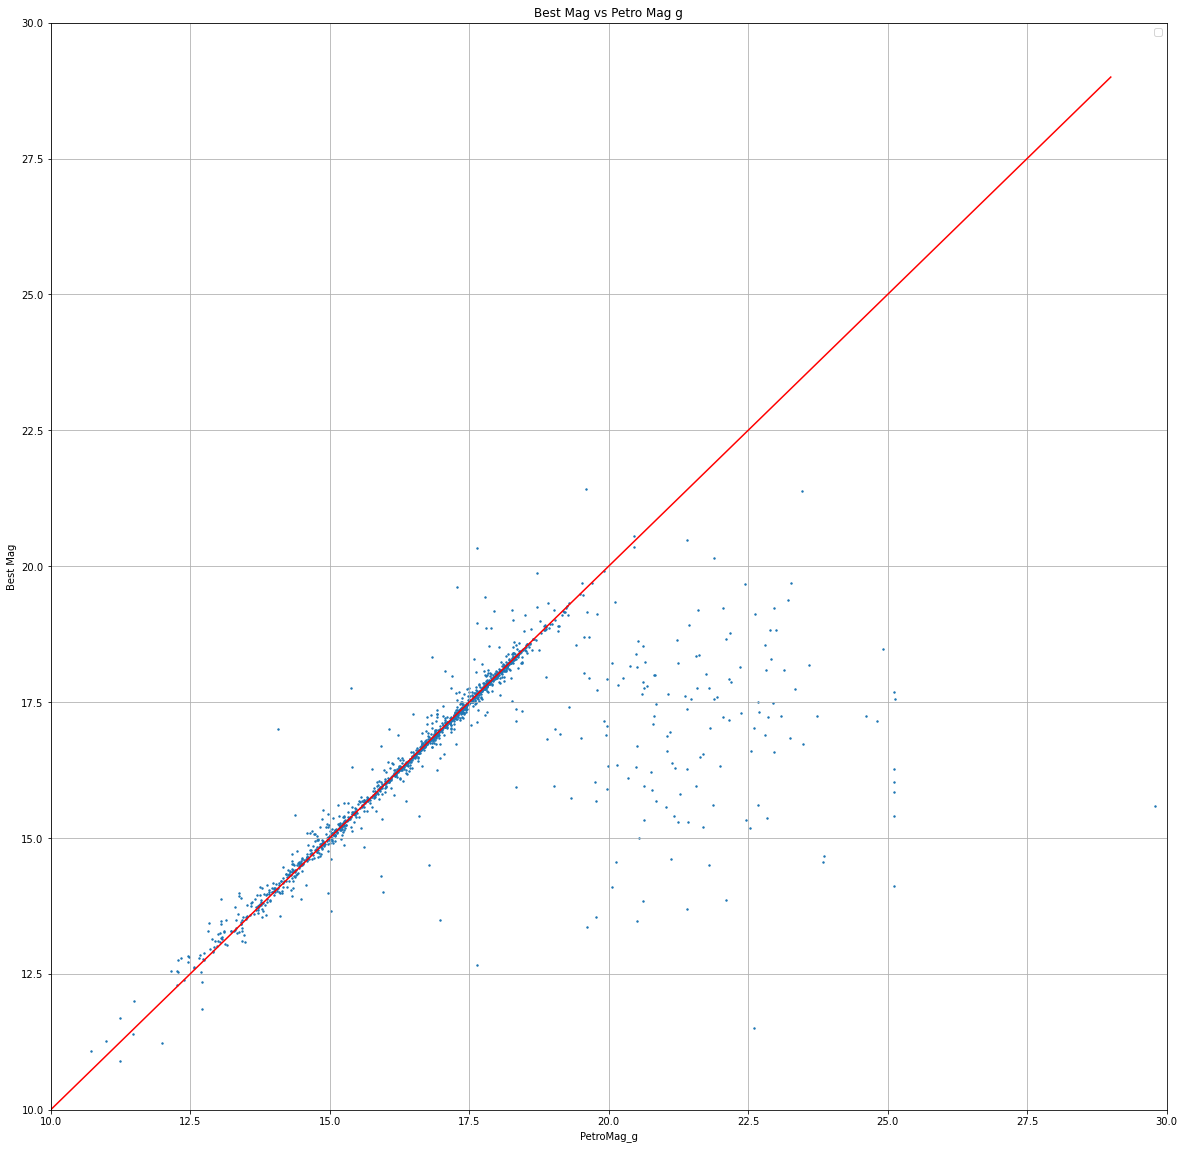

In [127]:
#plots

#x = raGalaxies[0:np.size(newRA)]
#plt.scatter(newArray, bestMag[0:np.size(newArray)], s = 5)

fig = plt.figure(figsize =(20, 20))
plt.scatter(petro_g, bestM, s = 2)
plt.plot(range(0,30), range(0,30), color = 'red')
plt.title("Best Mag vs Petro Mag g")
plt.xlabel("PetroMag_g")
plt.ylabel("Best Mag")
plt.xlim(10,30)
plt.ylim(10,30)
plt.legend()
plt.grid()
plt.show()  


From the previous data release to the current
DR7 vs DR17

In [94]:
"""filter = np.zeros( len(petro_g) )
indices = np.where( np.array(bestM) < np.array(petro_g) )

fig = plt.figure(figsize =(10, 10))
#plt.scatter( np.array(petro_g[int(np.array(indices))]) , np.array(bestM[int(np.array(indices))]), s = 5)
plt.scatter(petro_g[indices][:], bestM[indices][:])
plt.plot(range(0,30), range(0,30), color = 'red')
plt.title("Best Mag vs Petro Mag g")
plt.xlabel("PetroMag_g")
plt.ylabel("Best Mag")
plt.xlim(10,30)
plt.ylim(10,30)
plt.legend()
plt.grid()
plt.show() """

'filter = np.zeros( len(petro_g) )\nindices = np.where( np.array(bestM) < np.array(petro_g) )\n\nfig = plt.figure(figsize =(10, 10))\n#plt.scatter( np.array(petro_g[int(np.array(indices))]) , np.array(bestM[int(np.array(indices))]), s = 5)\nplt.scatter(petro_g[indices][:], bestM[indices][:])\nplt.plot(range(0,30), range(0,30), color = \'red\')\nplt.title("Best Mag vs Petro Mag g")\nplt.xlabel("PetroMag_g")\nplt.ylabel("Best Mag")\nplt.xlim(10,30)\nplt.ylim(10,30)\nplt.legend()\nplt.grid()\nplt.show() '

In [95]:
"""
array = [4, 10, 15]

L = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
Idx = np.array([0, 3, 7])
T = L[ Idx ]

T = [L[i] for i in Idx]
"""


777

In [83]:
#bestM[(indices, slice(None))]

770/1547

0.497737556561086

In [155]:
#find mean

def mean(value):
    sum = 0
    for i in range(np.size(value)):
        sum = sum + value[i]
    average = sum/np.size(value)
    return average

#get rid of outliers based on mean
def reject_outliers(data, dataNew):
    d = np.array(data) - np.array(dataNew) #see how far away from average
    mean = np.mean(d)
    standard_deviation = np.std(d)
    distance_from_mean = abs(d - mean)
    max_deviations = 2
    not_outlier = distance_from_mean < max_deviations * standard_deviation
    no_outliers = d[not_outlier]
    #mdev = mean(d)
    #s = d/mdev if mdev else 0.
    return no_outliers


In [157]:
an_array = np.array([1, 1, 1, 1, 1, 1, 10])
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = an_array[not_outlier]

print(no_outliers)

[1 1 1 1 1 1]


The mean =  -0.43799631092437


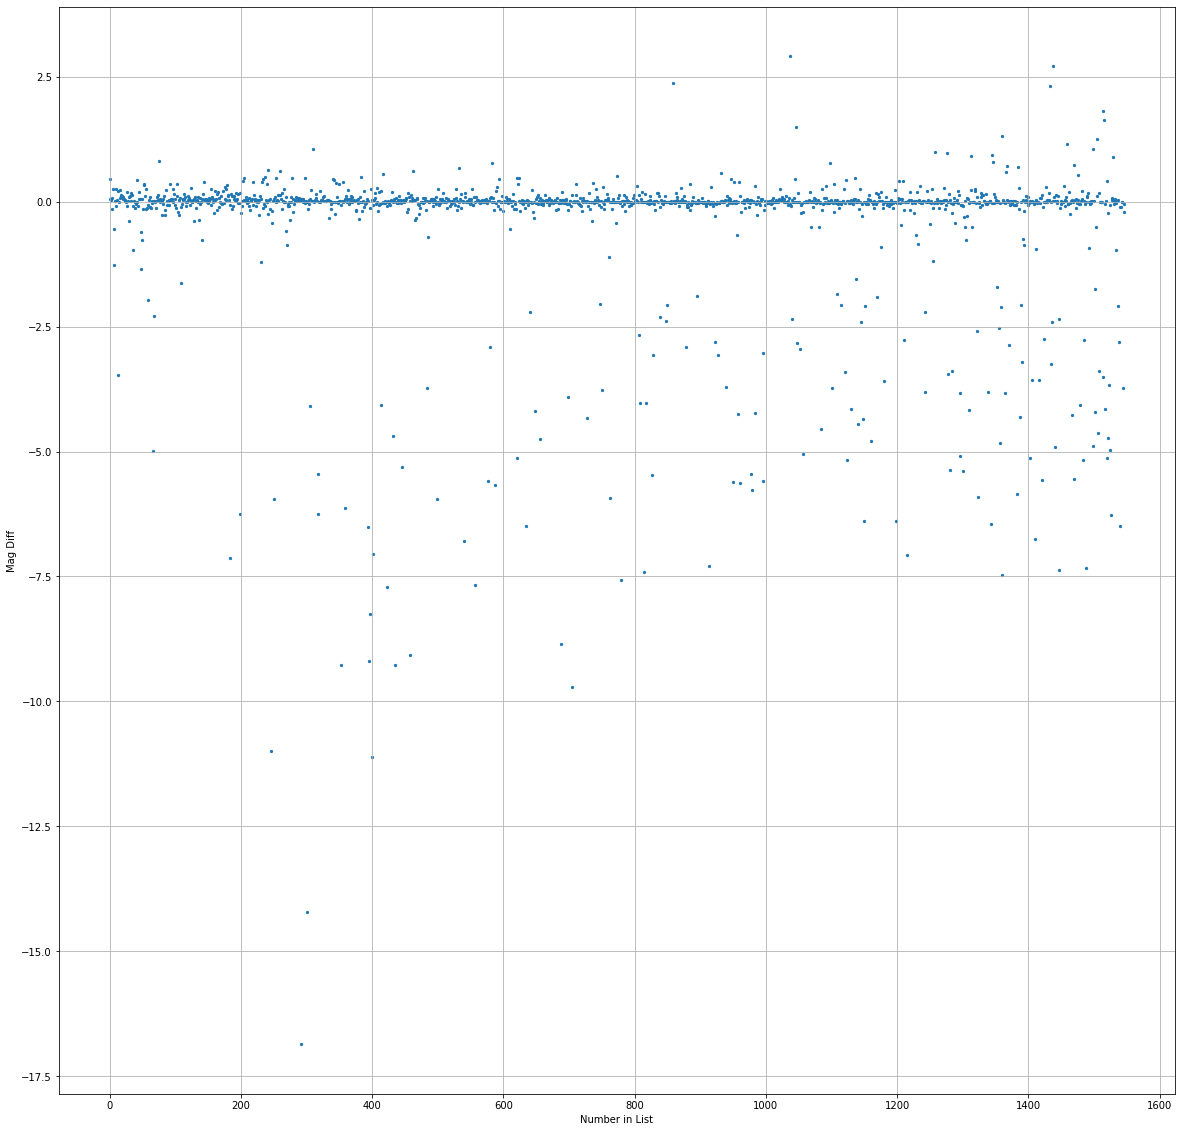

In [147]:
#difference in mag

fig = plt.figure(figsize =(20, 20))

#diff = np.fabs(np.array(bestM) - np.array(petro_g))
diff = np.array(bestM) - np.array(petro_g)


print("The mean = ", mean(diff))
plt.scatter(range(len(diff)), diff, s = 5)
plt.xlabel("Number in List")
plt.ylabel("Mag Diff")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  

In [156]:
diff_wo_outlier = reject_outliers(bestM, 2)

print("The mean = ", mean(diff_wo_outlier))
plt.scatter(range(len(diff_wo_outlier)), diff_wo_outlier, s = 5)
plt.xlabel("Number in List")
plt.ylabel("Mag Diff")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  

TypeError: only integer scalar arrays can be converted to a scalar index

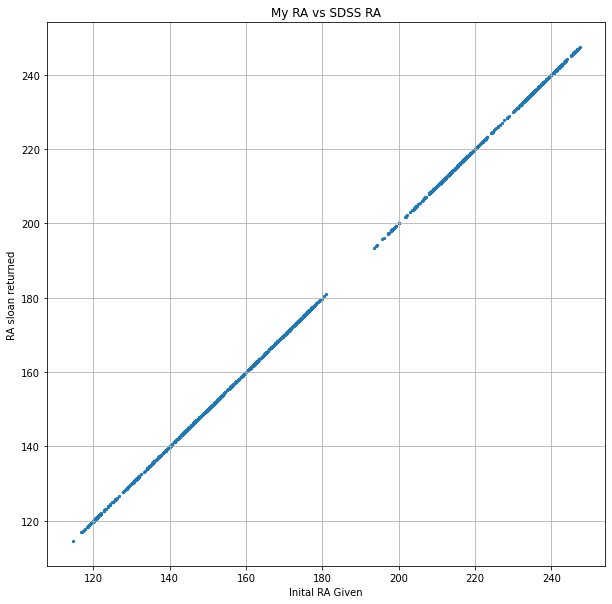

In [83]:
#difference in mag

fig = plt.figure(figsize =(10, 10))

diff = np.fabs(np.array(bestM) - np.array(petro_g))
plt.scatter(raG, newRA, s = 5)
plt.title("My RA vs SDSS RA")
plt.xlabel("Inital RA Given")
plt.ylabel("RA sloan returned")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  

In [119]:
np.max(diff)

16.864235

Here I calculate the rms

In [98]:
#sums up the square of all elements in an array 
def sum_sqr(x):
    arraySize = np.size(x)
    sum = 0
    for i in range(arraySize):
        num = x[i]
        sum = sum + num**2
    return sum
"""
n = np.size(petro_g)
rms = np.sqrt((1/n)*sum_sqr(petro_g))
print("rms of petromag g",rms)

n = np.size(bestM)
rms = np.sqrt((1/n)*sum_sqr(bestM))
print("rms of best mag",rms)

"""
diff = np.array(bestM) - np.array(petro_g)
#diff = np.fabs(np.array(bestM) - np.array(petro_g))
n = np.size(diff)
rms = np.sqrt((1/n)*sum_sqr(diff))
print("rms of the diff",rms)

rms of petromag g 17.090126893787644
rms of best mag 16.581292569865205
rms of the diff 1.6783357373716643


From DR7 to DR17, there are some objects who's magnitude has decreased and some who's magnitude has increased. I will first check those whose magnitudes has increased.

In [136]:
#looking for where magnitude got brighter
print("Writing file")

with open(r'mag_increase.txt', 'w') as fp:
    fp.write("Best_Mag\tPetro_Mag_g\tcModelMag\tPetroRad_g\tDifference\tMy_RA\tSDSS_RA\t\tMy_DEC\t\tSDSS_DEC\n")
    for i in range(np.size(bestM)):
        #if np.where(i == skippedIndices):
        #j = newArray[i]
        if bestM[i] > petro_g[i]:
            fp.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n" %( (bestM[i]), (petro_g[i]), (cModelMag[i]), (petroRad_g[i]), (np.fabs(bestM[i]-petro_g[i])), (raG[i]), (newRA[i]), (decG[i]), (newDEC[i]) ) )

Writing file


In [124]:
increMag = pd.read_csv("mag_increase.txt", delim_whitespace=True)  
increMag["Best_Mag"]
increMag["Petro_Mag_g"]
increMag["cModelMag"]
increMag["PetroRad_g"]
increMag["Difference"]
increMag["My_RA"]
increMag["SDSS_RA"]
increMag["My_DEC"]
increMag["SDSS_DEC"]

0       6.09701
1       9.16350
2      12.58164
3      15.78767
4       5.17625
         ...   
772    15.26103
773     4.07563
774    12.96143
775     5.29078
776    10.80985
Name: SDSS_DEC, Length: 777, dtype: float64

Seeing the rms of the difference of the magnitudes, of only ones that increased

In [125]:
diff = increMag["Difference"]
n = np.size(diff)
rms = np.sqrt((1/n)*sum_sqr(diff))
print("rms of the diff of increased magnitudes",rms)

rms of the diff of increased magnitudes 2.3498435891930343


In [132]:
#check changes
indices = np.where( np.array(bestM) - np.array(petro_g) > -2)
np.size(indices)
#print(bestM[array])
#142/1547

1405

Let's look at the photos from sdss

image 4
ra = 221.1223 and dec = 5.17625
best mag = 13.5 petro mag = 16.97043 difference = 3.47043


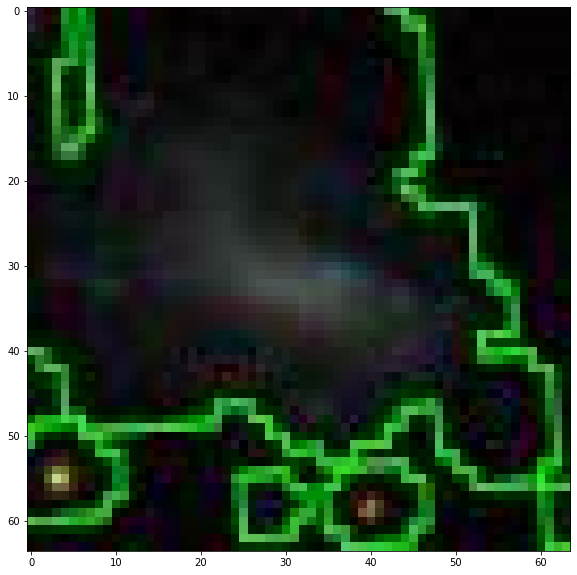

In [133]:
i = indices[0][4] #106
ra = increMag["SDSS_RA"][i]
dec = increMag["SDSS_DEC"][i]

SkyServer_DataRelease = "DR17"


print("image", i)
print("ra =", ra, "and dec =", dec) 
print("best mag =", increMag["Best_Mag"][i], "petro mag =", increMag["Petro_Mag_g"][i], "difference =", increMag["Difference"][i])
#print("ra =", ra, "and dec =", dec) 
img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=5, height=5, scale=.8,  opt='O',
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)


image 4
ra = 221.1223 and dec = 5.17625
best mag = 13.5 petro mag = 16.97043 difference = 3.47043


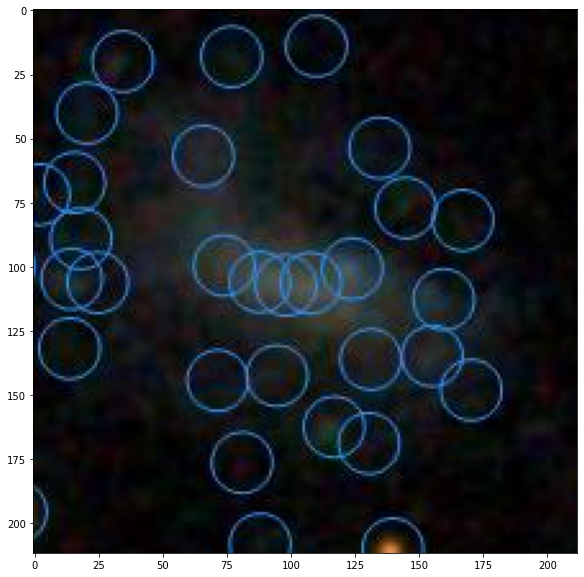

In [134]:
#i = indices[0]  #106
#DR17
ra = increMag["SDSS_RA"][i]
dec = increMag["SDSS_DEC"][i]

SkyServer_DataRelease = "DR17"

print("image", i)
print("ra =", ra, "and dec =", dec) 
print("best mag =", increMag["Best_Mag"][i], "petro mag =", increMag["Petro_Mag_g"][i], "difference =", increMag["Difference"][i])

img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=212, height=212, scale=.2,  opt='P',
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)

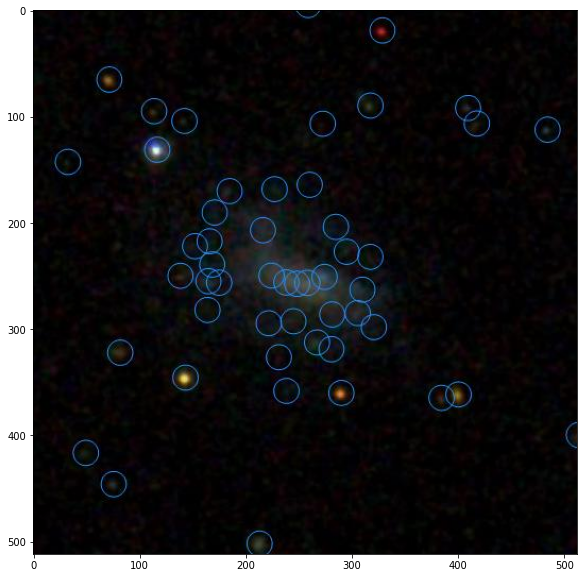

In [135]:
img = SkyServer.getJpegImgCutout(ra=ra, dec=dec, width=512, height=512, scale=0.2, opt='P', 
                                 dataRelease=SkyServer_DataRelease)

fig = plt.figure(figsize =(10, 10))
plt.imshow(img)

In [44]:
help(SkyServer.getJpegImgCutout)

Help on function getJpegImgCutout in module SciServer.SkyServer:

getJpegImgCutout(ra, dec, scale=0.7, width=512, height=512, opt='', query='', dataRelease=None)
    Gets a rectangular image cutout from a region of the sky in SDSS, centered at (ra,dec). Return type is numpy.ndarray.
    
    
    :param ra: Right Ascension of the image's center in floating point ICRS J2000 coordinates.
    :param dec: Declination of the image's center in floating point ICRS J2000 coordinates.
    :param scale: Scale of the image, measured in [arcsec/pix]
    :param width: Width of image, measured in pixels (width in arcsec = width * scale). If larger than 2048, silently truncated to 2048.
    :param height: Height of image, measured in pixels (width in arcsec = width * scale). If larger than 2048, silently truncated to 2048.
    :param opt: Optional drawing options, expressed as concatenation of letters (string). The letters options are 
    
        "G": Grid. Draw a N-S E-W grid through the center
  

Reasons why the magnitude increased.